## Student Performance Indicator

### Life Cycle of Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1) Problem statement
* projek ini bertujuan untuk memahami bagaimana perforfa siswa(test score) terhadap variabel seperti jenis kelamin, etnis, parental level of education, makan siang dan pelatihan persiapan tes

### 2) Data Collection
* sumber data : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv
* data terdiri dari 8 kolom dan 1000 baris

### 2.1 Import data dan Paket yang diperlukan
import paket pandas, numpy, matplotlib, seaborn, dan warning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

impor file csv sebagai dataframe

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

top 5 record

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape dari dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Informasi Dataset
* gender : Jenis kelamin dari siswa (Female dan Male)
* race/ethnicity : etnis dari siswa (A,B,C,D,E)
* parental level education : level sekolah dari orang tua
* lunch : apakah makan siang sebelum makan siang
* test preparation course : menyelesaikan atau tidak menyelesaikan sebelum tes 
* math score 
* reading score 
* writing score 

### 3) pengecekan data
* cek missing value
* cek duplikat
* cek tipe data
* cek berapa unique value (nilai unik) pada masing-masing kolom
* cek nilai statistik dari dataset
* cek variasi kategori yang ada pada kolom kategori

3.1 cek missing value

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

3.2 cek duplikat

In [6]:
df.duplicated().sum()

0

3.3 cek tipe data 

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 cek nilai unik pada masing-masing kolom

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 cek nilai statistic


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight dari data :
* dari nilai statistika deskripsi diatas dapat dilihat, semua nilai rataan hampir mirip satu dengan lain antara 66 dan 68
* semua standar deviasi juga memiliki nilai yang hampir mirip juga, antara 14 dan 15
* sementara nilai minimum untuk math score = 0, nilai minimum reading = 17, dan nilai minimum untuk writing = 10

3.6 variasi kategori yang ada pada kolom kategori

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print('Categori pada variabel gender : ',end=' ')
print(df['gender'].unique())

print('Categori pada variabel race/ethnicity : ',end=' ')
print(df['race/ethnicity'].unique())

print('Categori pada variabel parental level of education : ',end=' ')
print(df['parental level of education'].unique())

print('Categori pada variabel lunch : ',end=' ')
print(df['lunch'].unique())

print('Categori pada variabel test preparation course : ',end=' ')
print(df['test preparation course'].unique())

Categori pada variabel gender :  ['female' 'male']
Categori pada variabel race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categori pada variabel parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categori pada variabel lunch :  ['standard' 'free/reduced']
Categori pada variabel test preparation course :  ['none' 'completed']


In [12]:
# define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print column
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 menambahkan kolom untuk 'Total Skor' dan 'Rata-rata'

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = df[df['math score'] == 100]['average'].count()
print(f'Jumlah siswa dengan nilai sempurna pada matematika: {math_full}')

reading_full = df[df['reading score'] == 100]['average'].count()
print(f'Jumlah siswa dengan nilai sempurna pada reading: {math_full}')

writing_full = df[df['writing score'] == 100]['average'].count()
print(f'Jumlah siswa dengan nilai sempurna pada writing: {math_full}')

Jumlah siswa dengan nilai sempurna pada matematika: 7
Jumlah siswa dengan nilai sempurna pada reading: 7
Jumlah siswa dengan nilai sempurna pada writing: 7


In [15]:
math_less_20 = df[df['math score'] <= 20]['average'].count()
print(f'Jumlah siswa dengan nilai kurang dari 20 pada matematika: {math_full}')

reading_less_20 = df[df['reading score'] <= 20]['average'].count()
print(f'Jumlah siswa dengan nilai kurang dari 20 pada reading: {math_full}')

writing_less_20 = df[df['writing score'] <= 20]['average'].count()
print(f'Jumlah siswa dengan nilai kurang dari 20 pada writing: {math_full}')

Jumlah siswa dengan nilai kurang dari 20 pada matematika: 7
Jumlah siswa dengan nilai kurang dari 20 pada reading: 7
Jumlah siswa dengan nilai kurang dari 20 pada writing: 7


### 4) Eksplorasi data (Visualisasi)

4.1 visualisasi  distribusi nilai rata-rata untuk membuat beberapa kesimpulan
* Histogram
* Kernel Distribution Function (KDE)

4.1.1 Histogram dan KDEM

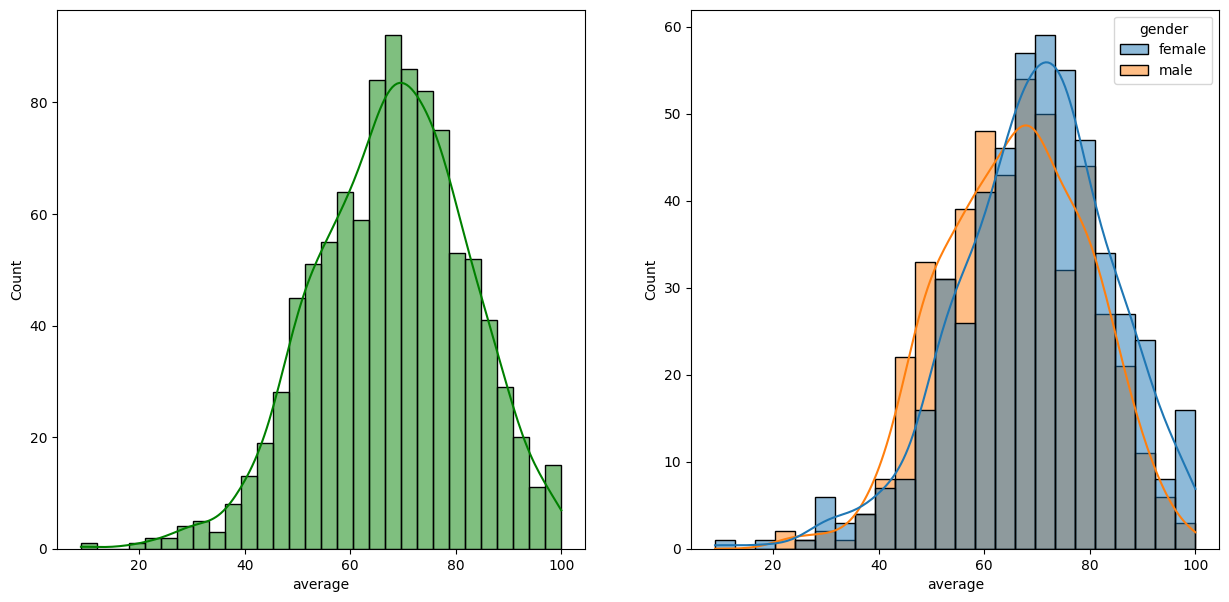

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

### Insight
* siswa perempuan menunjukan performa yang lebih baik dibandingkan dengan siswa pria

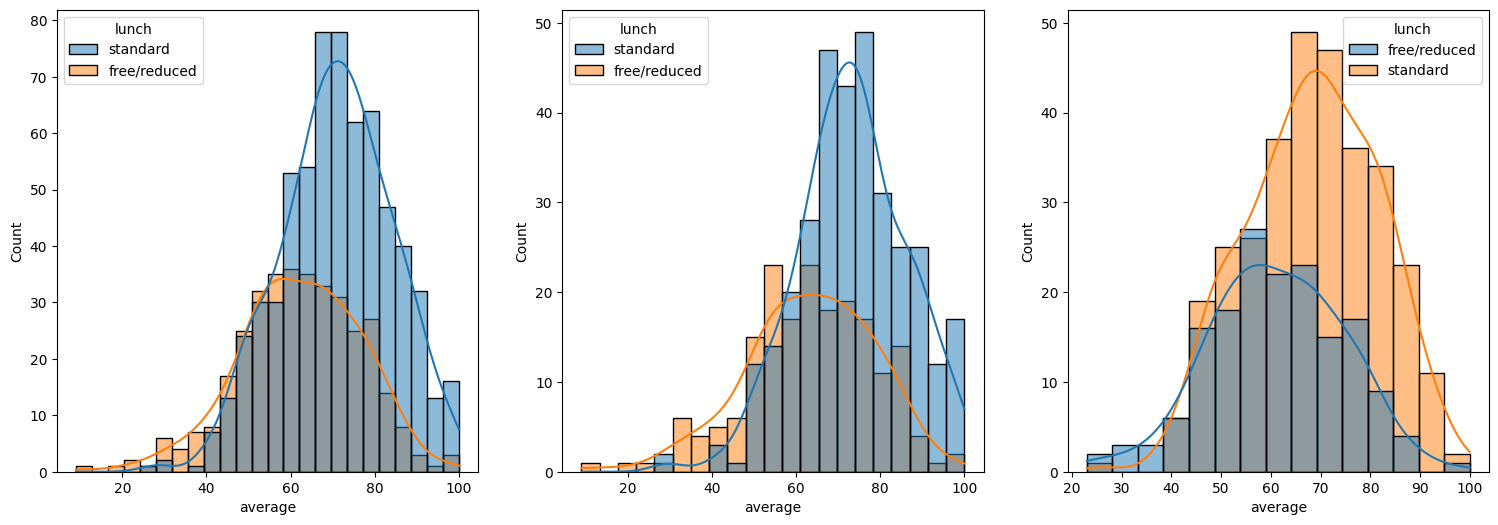

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insight :
* Makan siang membantu performa dalam ujian
* Makan siang membantu baik untuk siswa perempuan maupun siswa pria

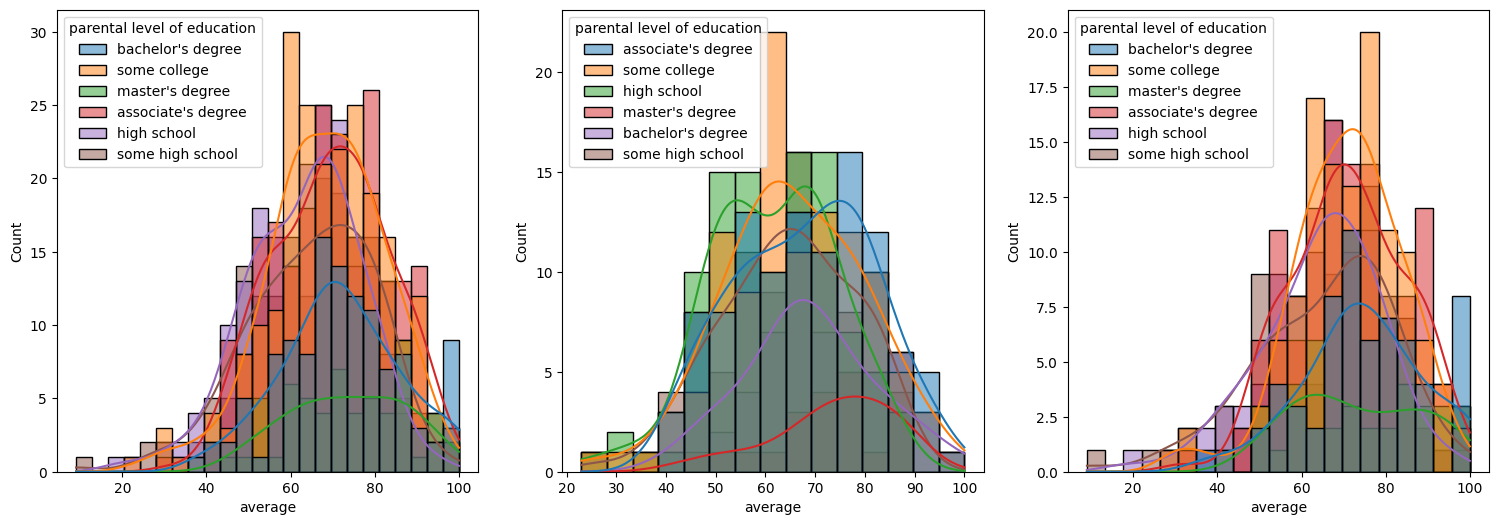

In [18]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### Insight :
* pada umumnya tingkat pendidikan orang tua tidak mempengaruhi hasil ujian siswa
* plot ke 2 menunjukan bahwa orang tua siswa yang memiliki pendidikan setara s1 dan pendidikan master, anak laki-laki mereka cenderung menunjukan perfoma yang baik dalam ujian
* plot ke 3 menunjukan bahwa tingkat pendidikan orang tua tidak memiliki pengaruh terhadap performa siswa perempuan dalam ujian

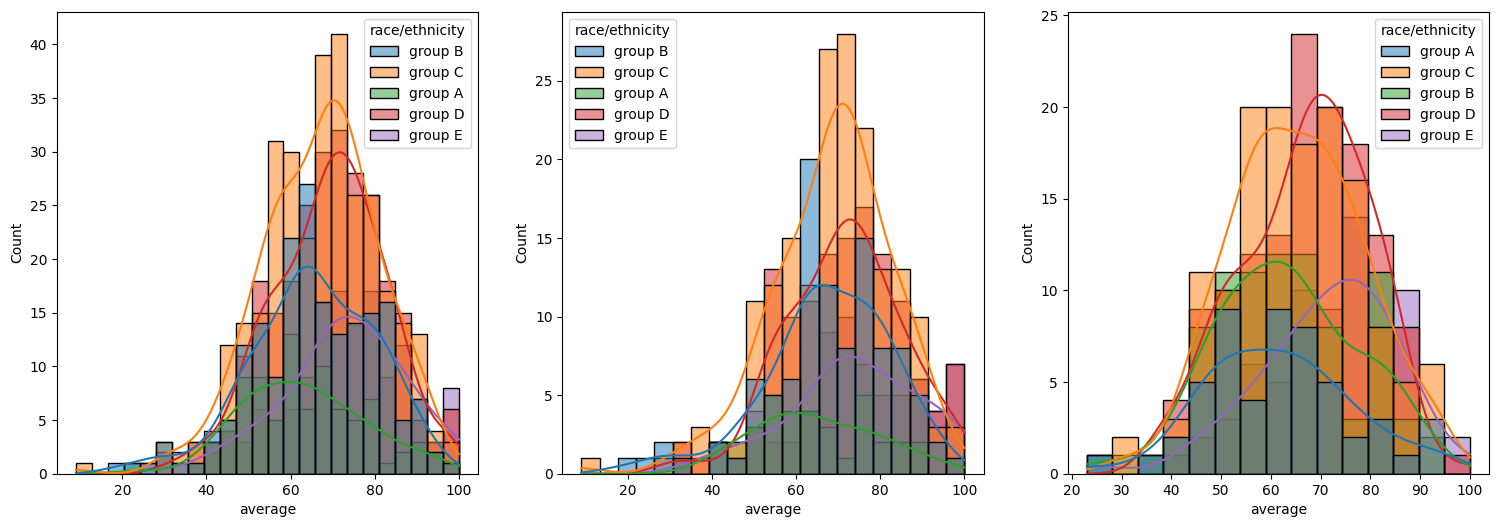

In [19]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

### Insights:
* Siswa dari grup A dan grup B menunjukan performa yang buruk dalam ujian
* Siswa dari grup A dan grup B pada kelompok perempuan dan laki-laki sama-sama menunjukan performa yang buruk dalam ujian

4.2 nilai maksimal siswa pada 3 subjek ujian

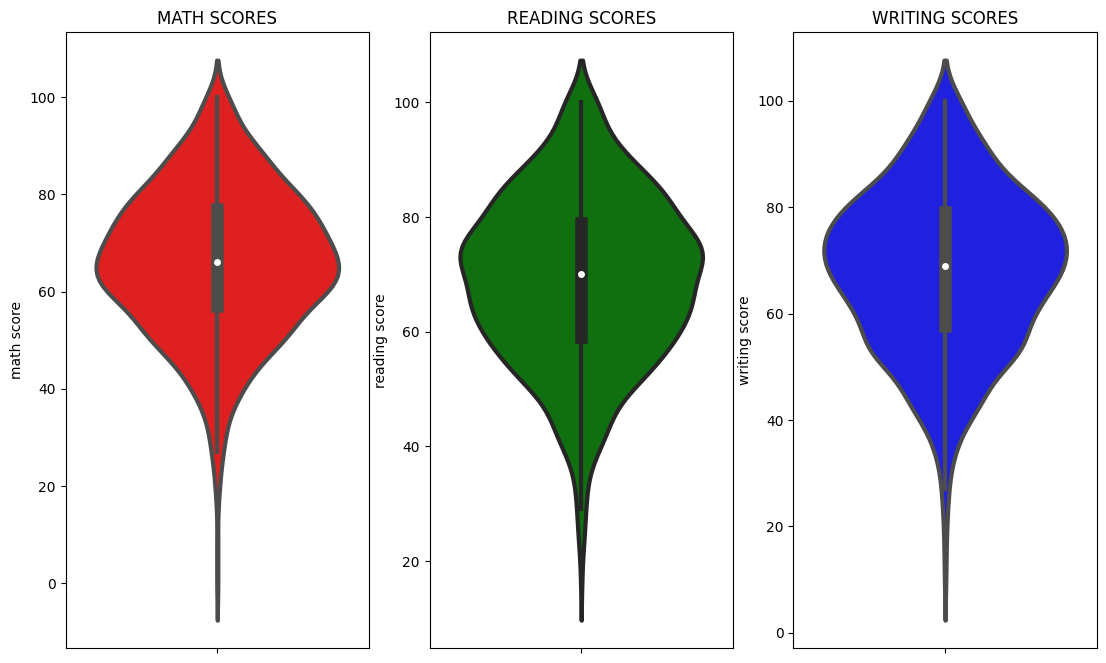

In [20]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insights:
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 analisis multivariat menggunakan pie chart

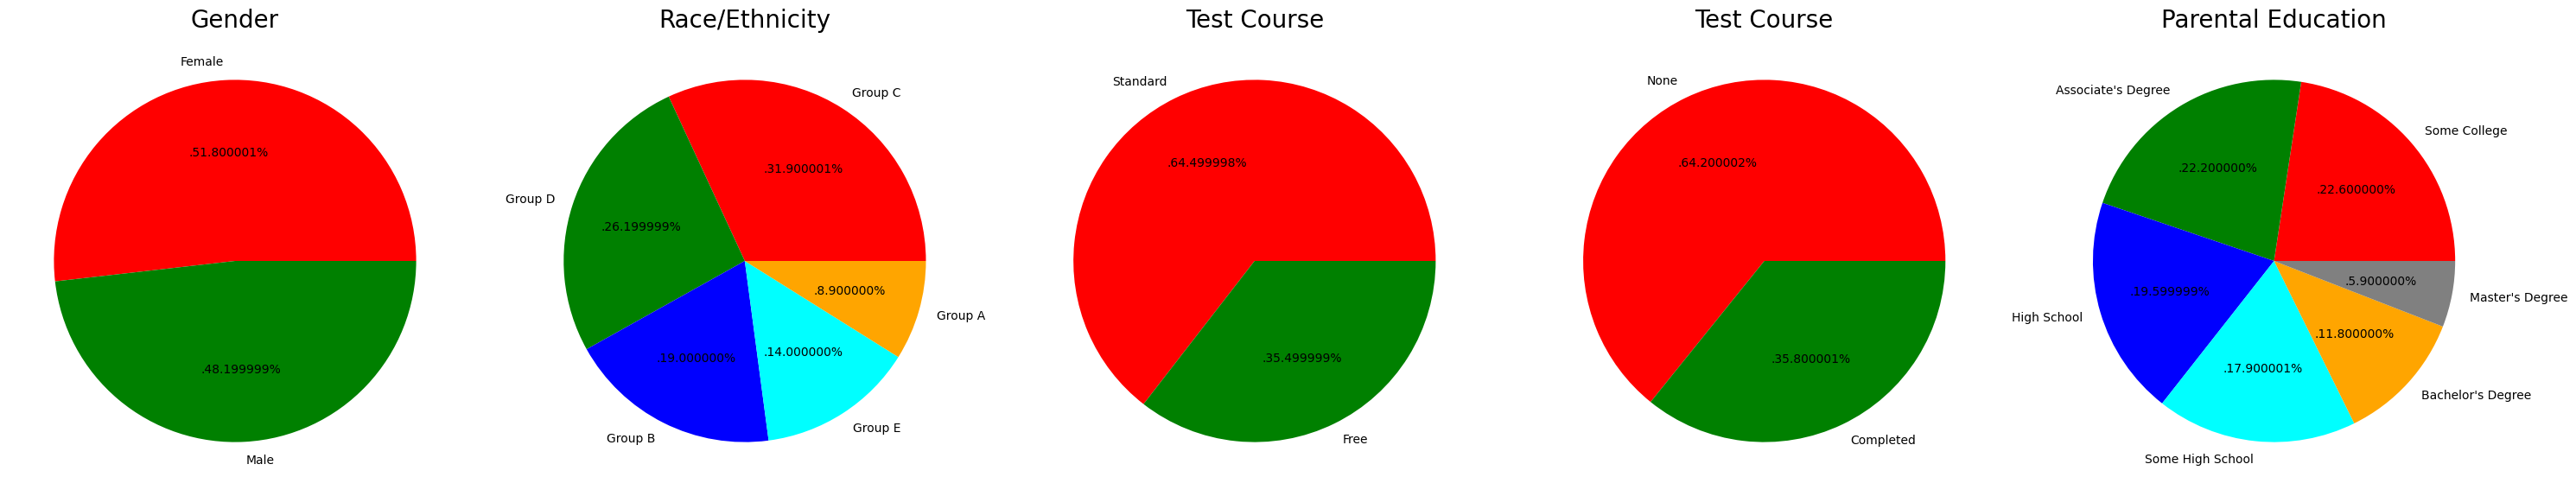

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']


plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


Insights:
* Jumlah dari siswa perempuan dan siswa laki-laki hampir sama
* Jumlah siswa pada grup c lebih dari grup lain
* Jumlah siswa yang makan siang lebih banyak diandingkan siswa yang tidak makan siang
* Jumlah siswa yang tidak mengikuti persiapan tes lebih banyak dibandingkan siswa yang mengikuti persiapan tes
* Jumlah siswa yang memiliki orang tua dengan pendidikan 'some college' adalah yang paling besar, kemudian diikuti oleh siswa dengan orang tua yang memiliki pendidikan 'association college'

4.4 Visualisasi berdasarkan feature

4.4.1 KOLOM GENDER
* mengetahui bagaimana distribusi gender
* apakah gender memiliki pengaruh terhadapa performa ujian siswa

UNIVARIAT ANALISIS (Bagaimana distribusi dari gender ?)

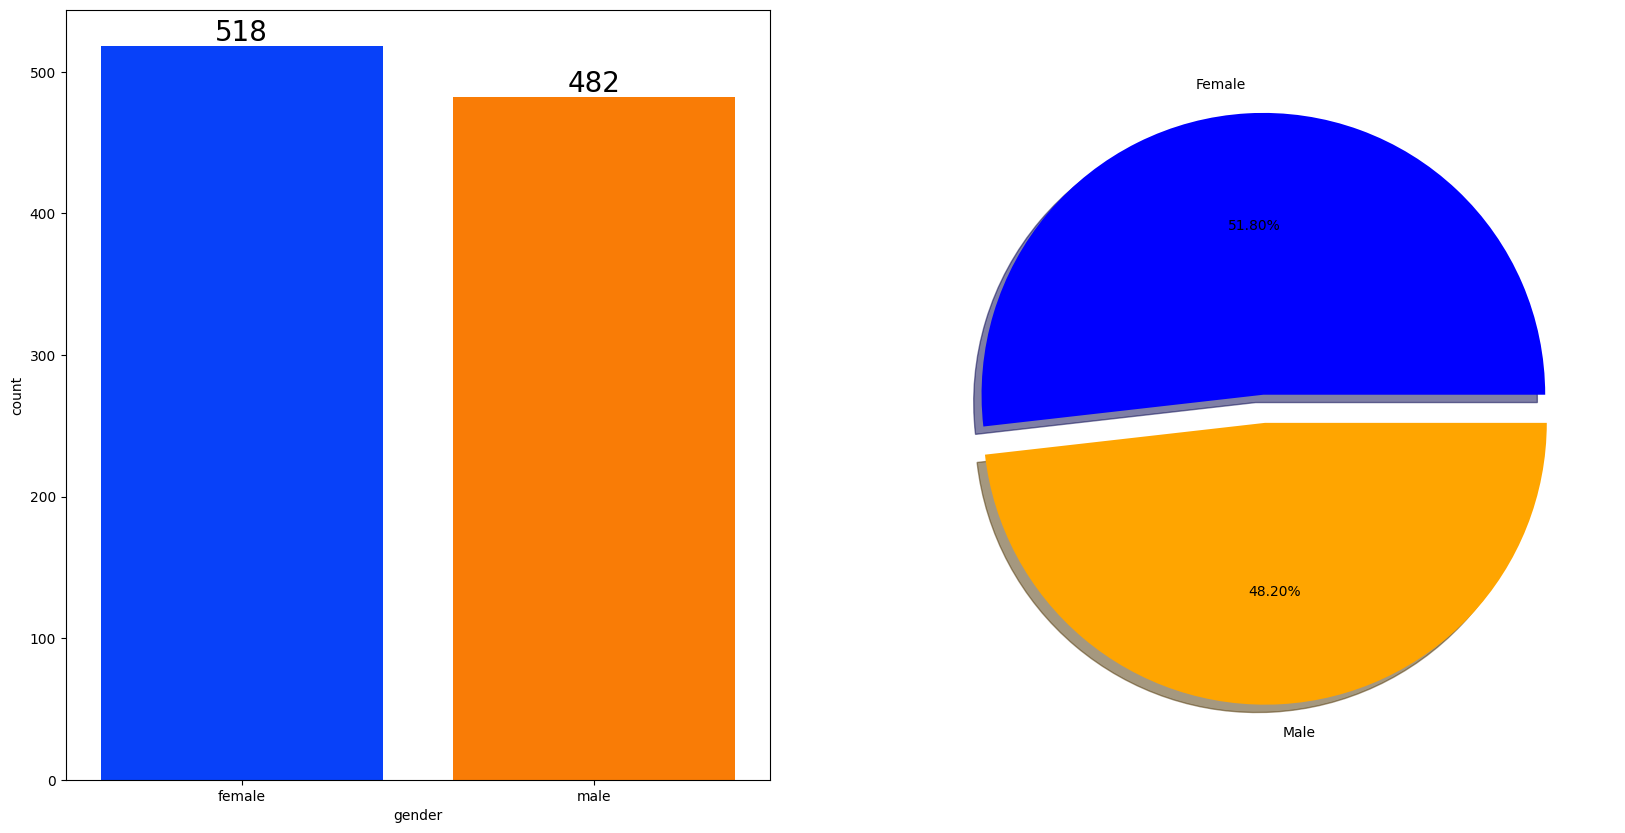

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.2f%%',shadow=True,colors=['blue','orange'])
plt.show()

### Insights :
* Gender mempunyai data yang seimbang, dimana siswa perempuan berjumlah 518 (51,80%) dan siswa laki-laki berjumlah 482 (48,2%)

BIVARIAT ANALISIS (apakah gender mempunyai pengaruh terhadap performa ujian dari siswa ?)

In [23]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


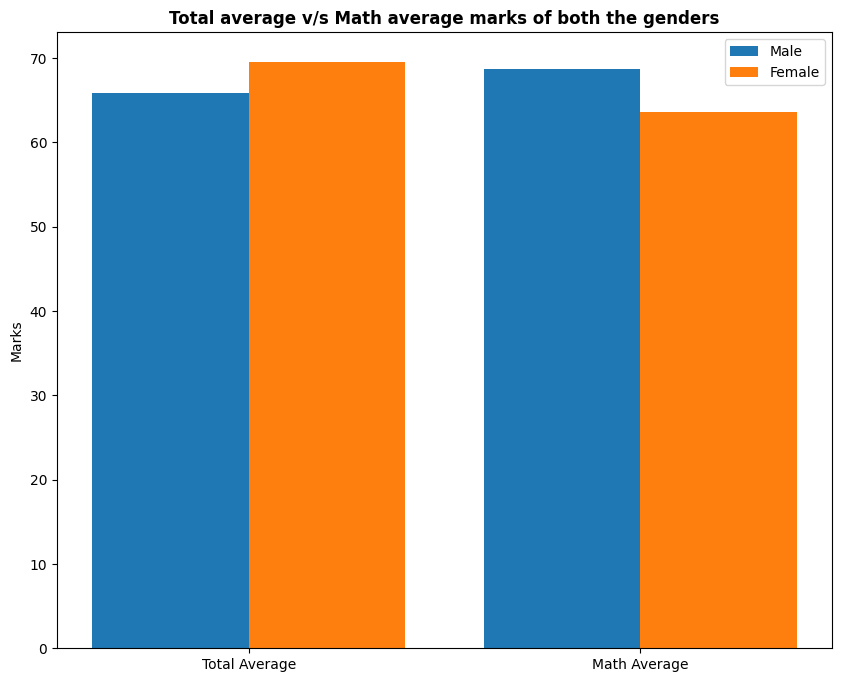

In [24]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights :
* pada rata-rata skor terlihat perempuan memiliki nilai rata-rata yang lebih baik dibandingkan laiki-laki
* laki-laki memiliki skor matematika yang lebih baik dari perempuan

4.4.2 KOLOM RACE/ETHNICITY
* mengetahui bagaimana distribusi dari race/ethnicity
* apakah race/ethnicity memiliki pengaruh terhadapa performa ujian siswa

UNIVARIAT ANALISIS (Bagaimana distribusi dari race/ethnicity)

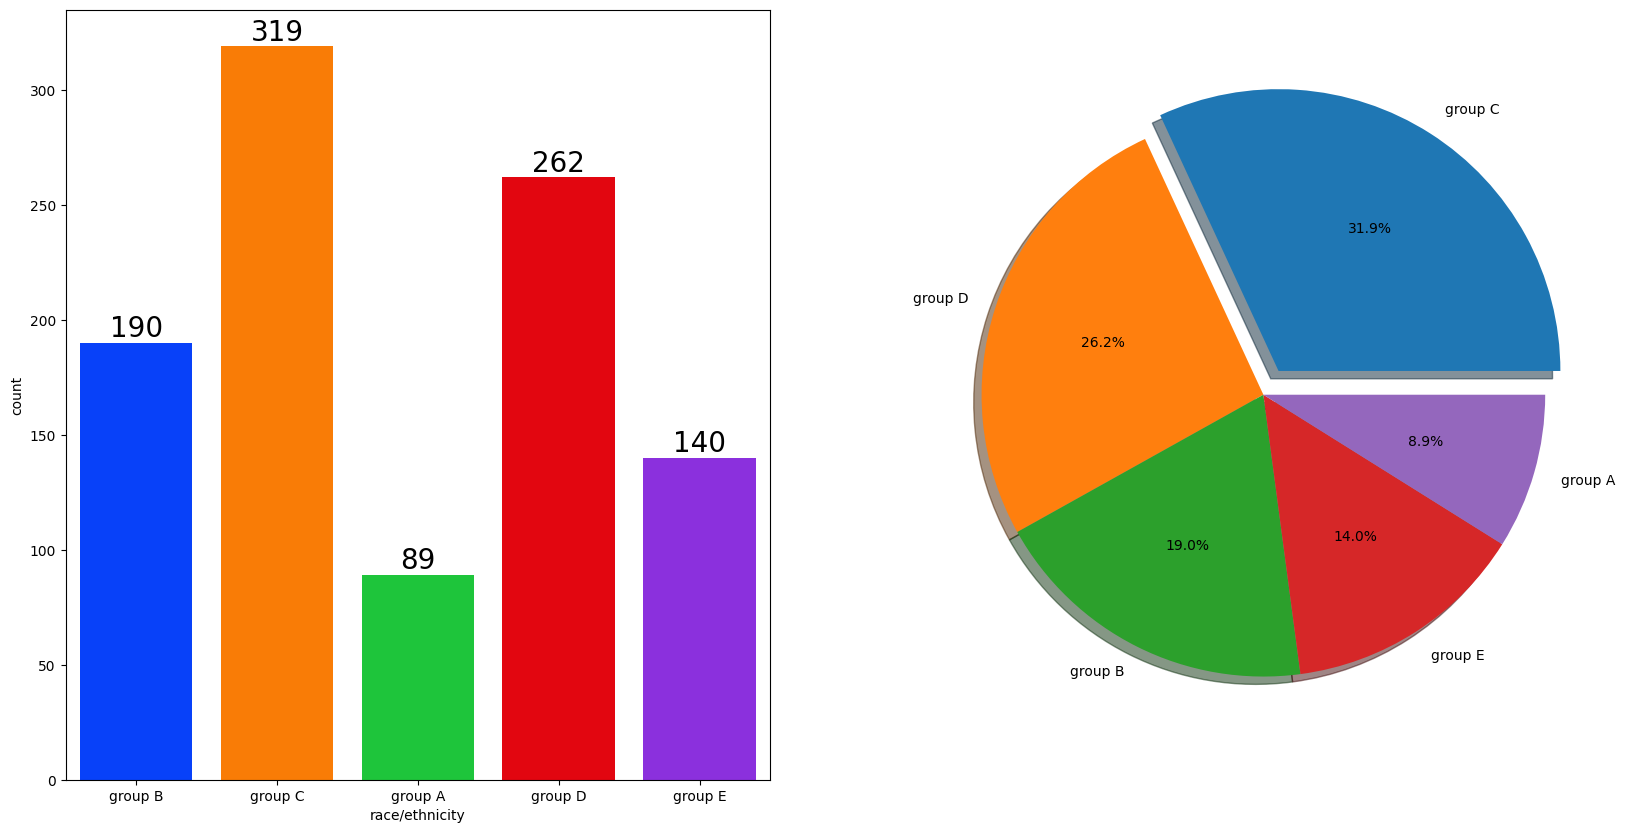

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Insights :
* kebanyakan siswa berasal dari grup c dan grup d
* sedangkan pada grup a memiliki siswa yang paling sedikit

BIVARIAT ANALISIS (Apakah Group(race/ethniciy) memiliki pengaruh terhadap performa siswa)

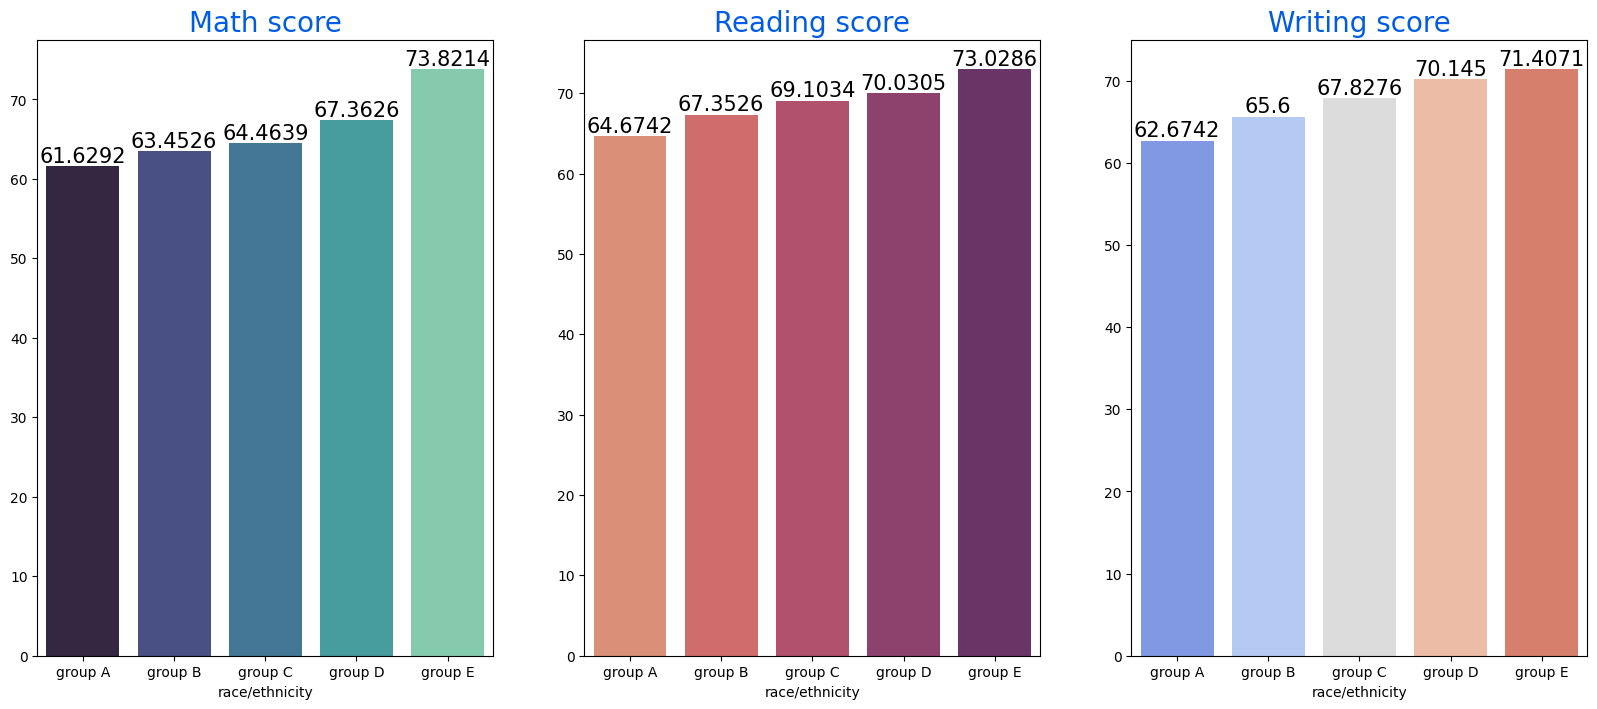

In [26]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights :
* group e memiliki nilai yang paling tinggi pada masing ujian
* siswa pada grup a memiliki nilai yang paling rendah pada semua ujian

    

4.4.3 Kolom pendidikan orang tua
* Apa latar belakang pendidikan orang tua dari siswa ?
* Apakah pendidikan orang tua mempunyai pengaruh terhadap performa murid dalam ujian ?

Analisis Univariat (apa latar belakang pendidikan orang tua siswa)

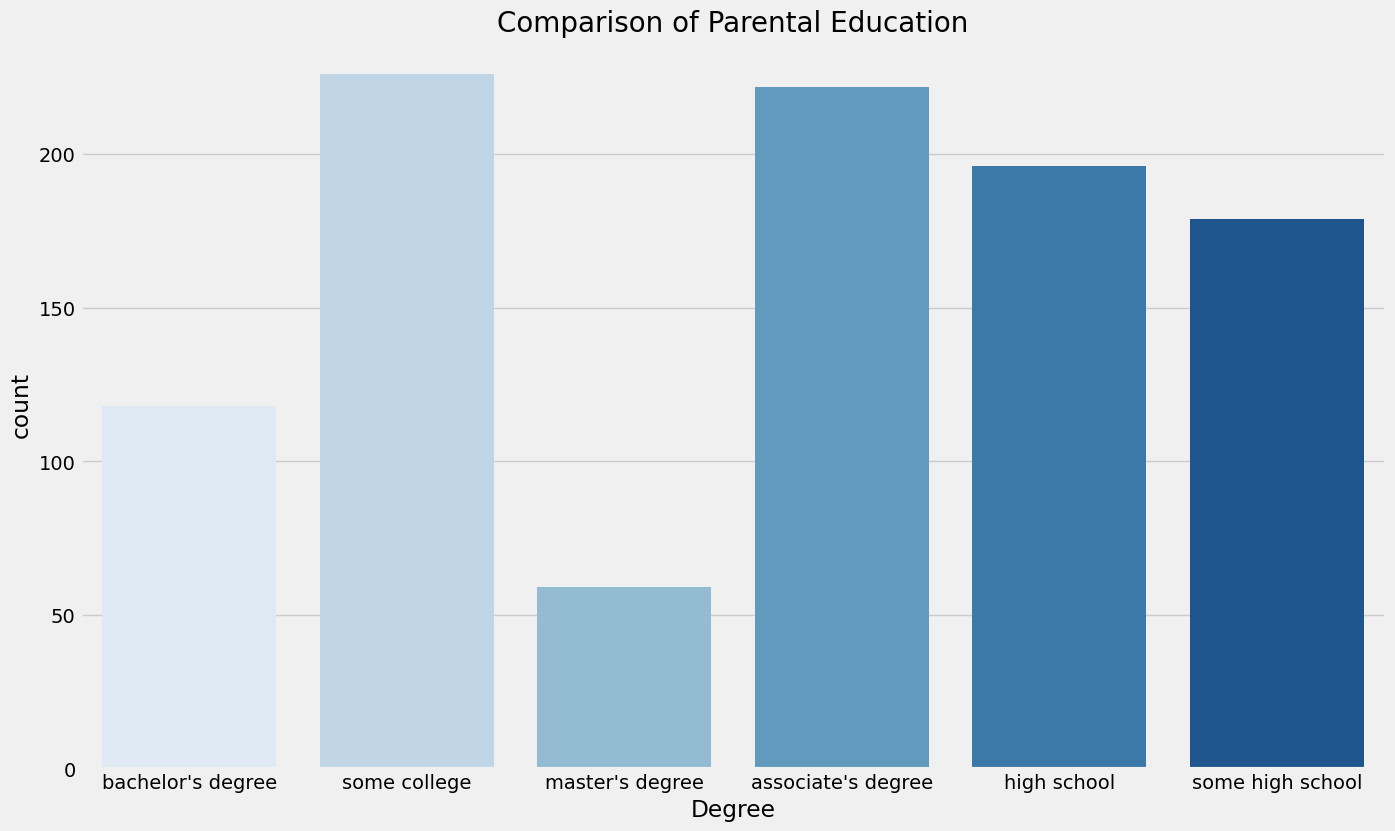

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights:
* Latar belakang orang tua siswa paling banyak berasal dari 'some college'

Analisis Bivariat (apakah latar belakang pendidikan orang tua memiliki pengaruh terhadap performa siswa?) 

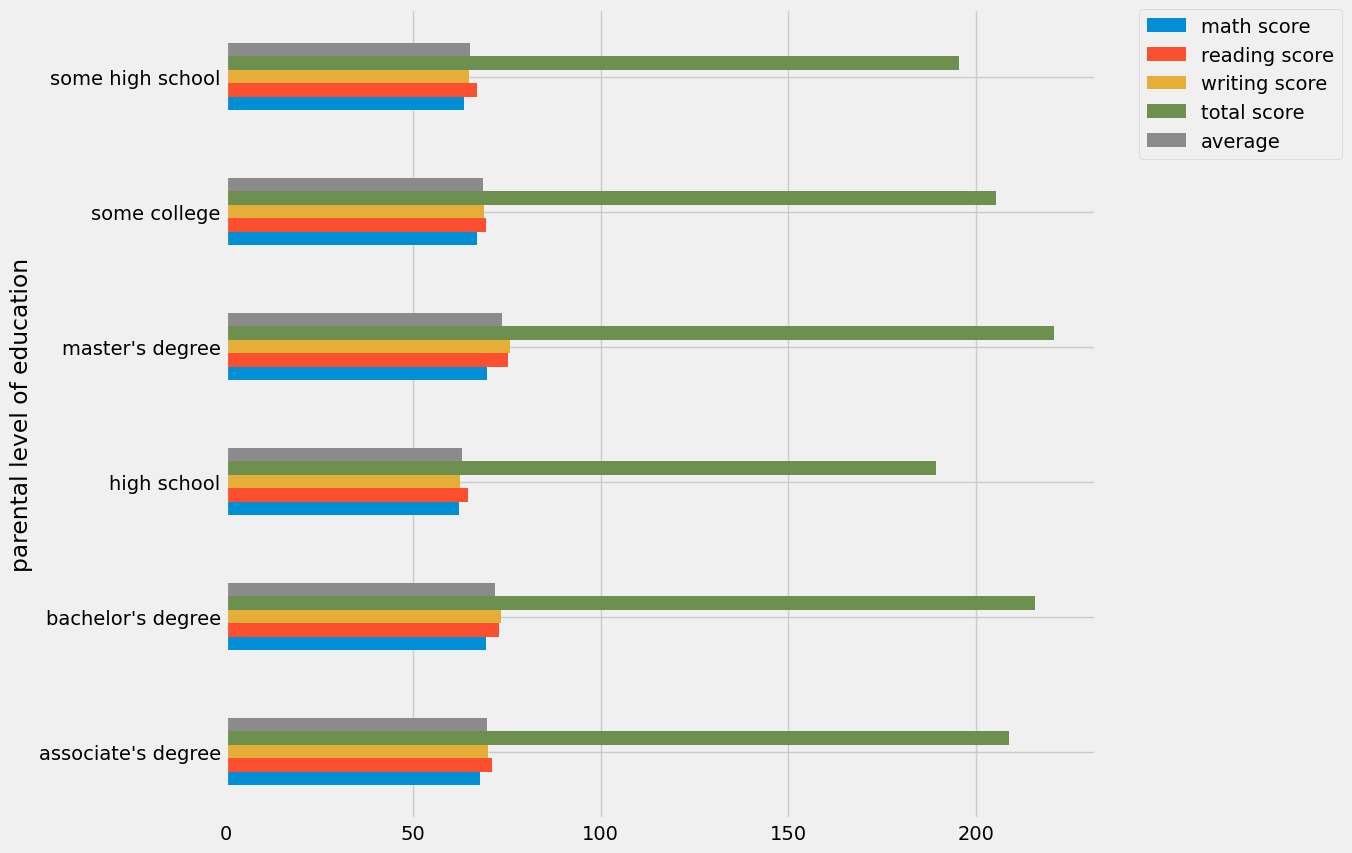

In [28]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'total score', 'average']].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
* Skor untuk siswa dengan orang tua master dan bachelor lebih tinggi dari yang lain

4.4.4 Kolom makan siang
* tipe makan siang manakah yang paling banyak dimiliki siswa
* apakah makan siang berpengaruh terhadap performa ujian siswa ?

Analisis Univariat

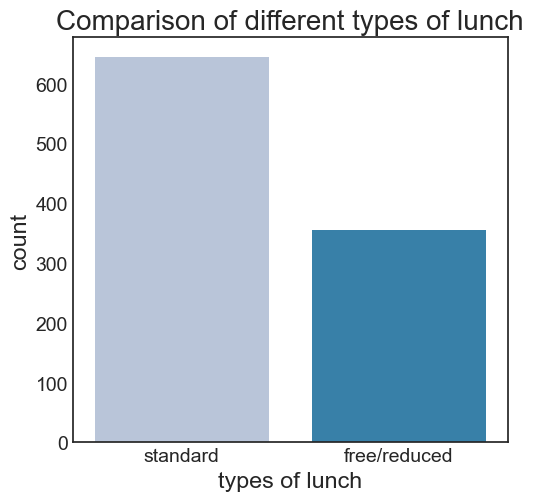

In [29]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('seaborn-white')
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
* siswa dengan lunch standar lebih banyak dibanding dengan siswa yang free lunch

Analisis Bivariat

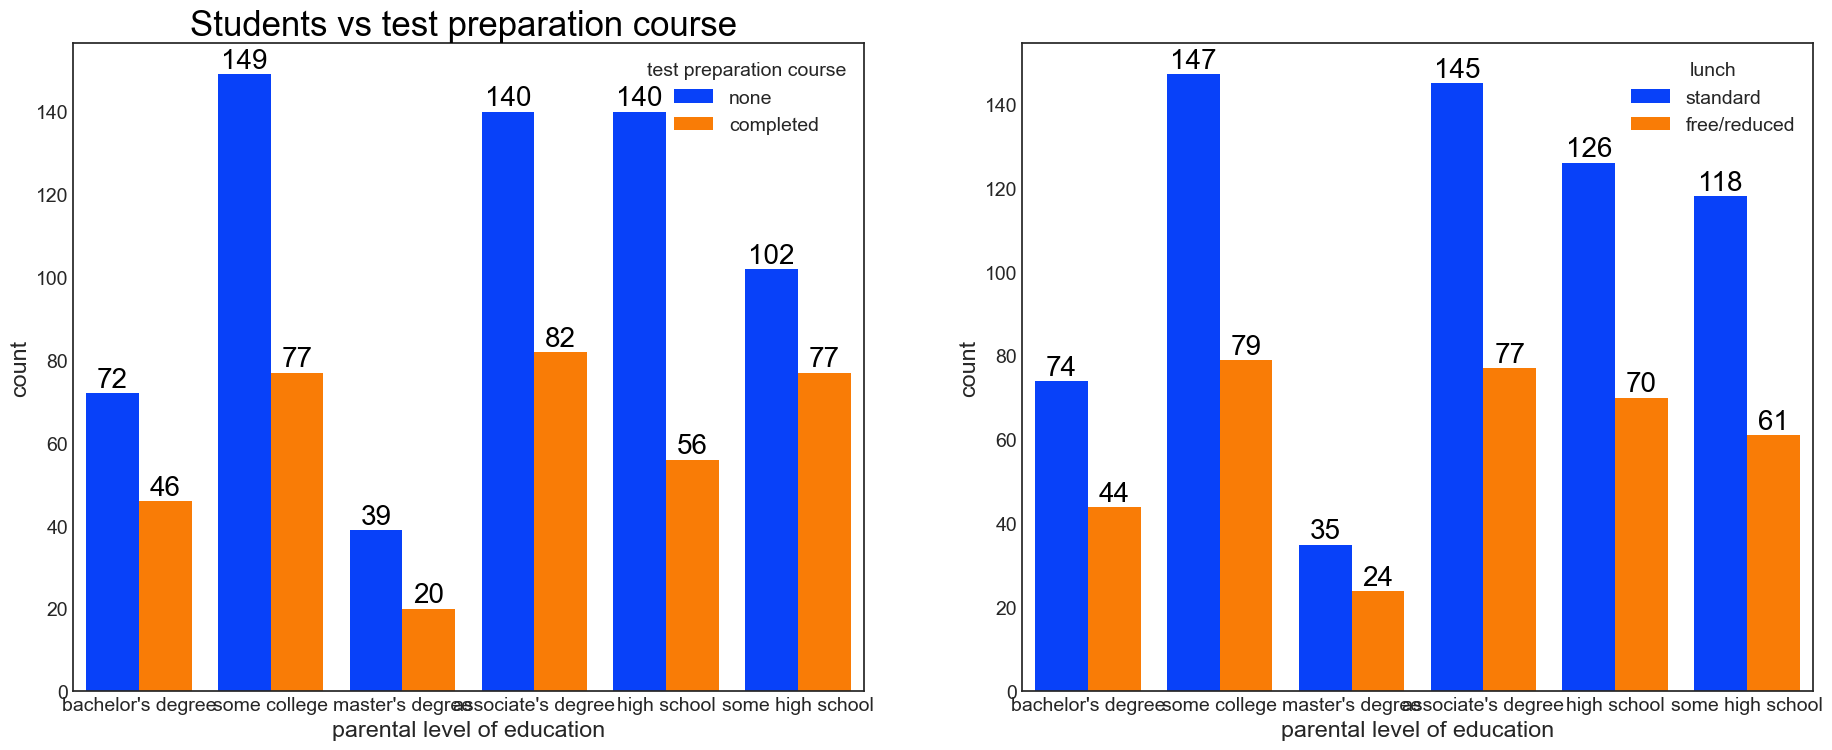

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

Insights :
* siswa yang mendapat standar lunch cenderung menunjukan performa yang baik dibandingkan yang free lunch

4.4.5 Kolom Persiapan pelatihan

Analisis Bivariat

<Axes: xlabel='lunch', ylabel='writing score'>

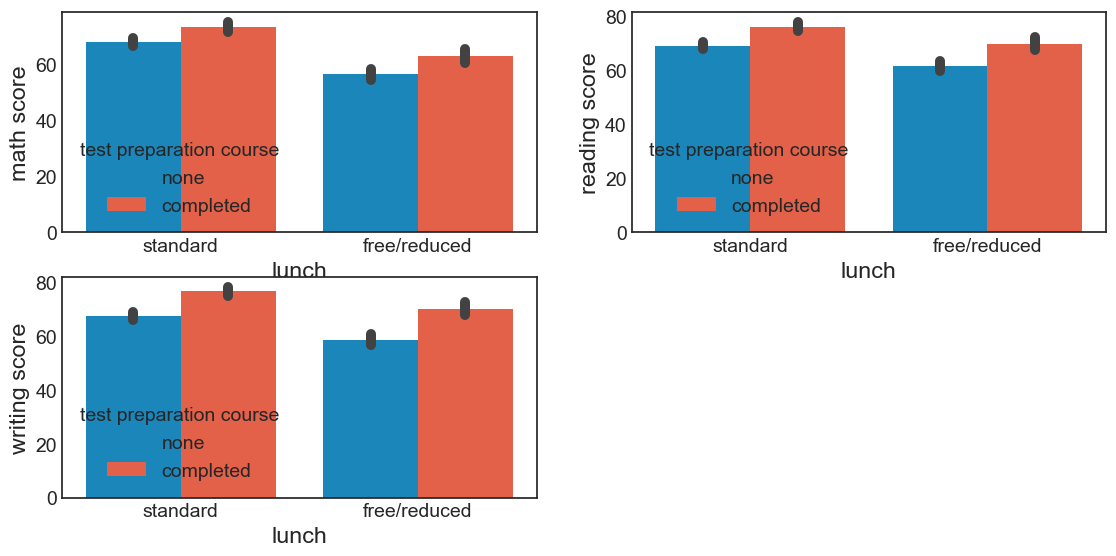

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Insights
* Siswa yang mengikuti persiapan tes, memiliki nilai skor yang lebih tinggi pada 3 kategori dibandingkan dengan yang tidak mengikuti persiapan test

4.4.6 Mengecek outlier

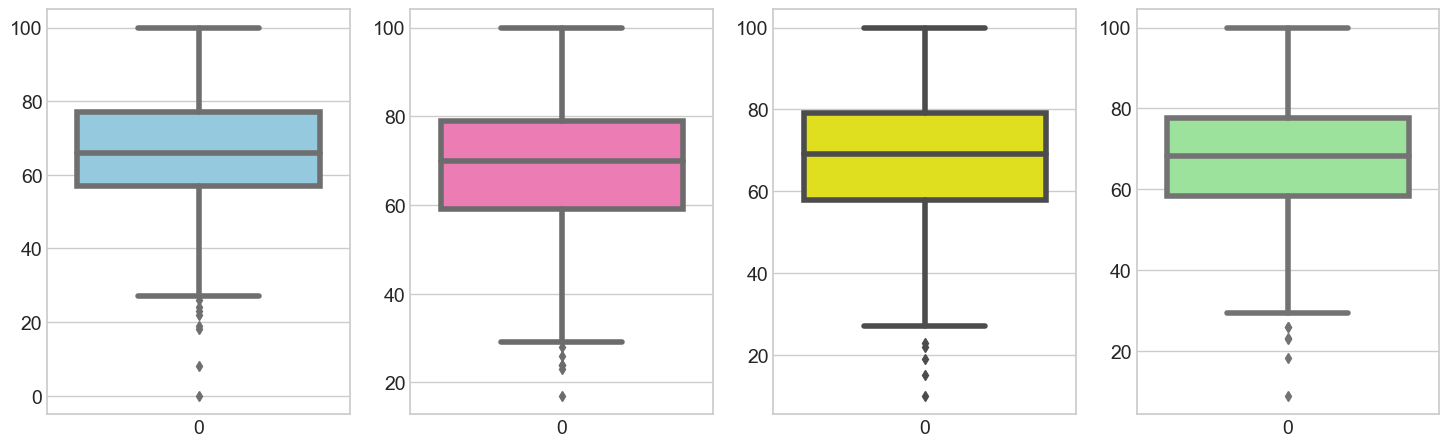

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 Analisis Multivariat menggunakan pairplot

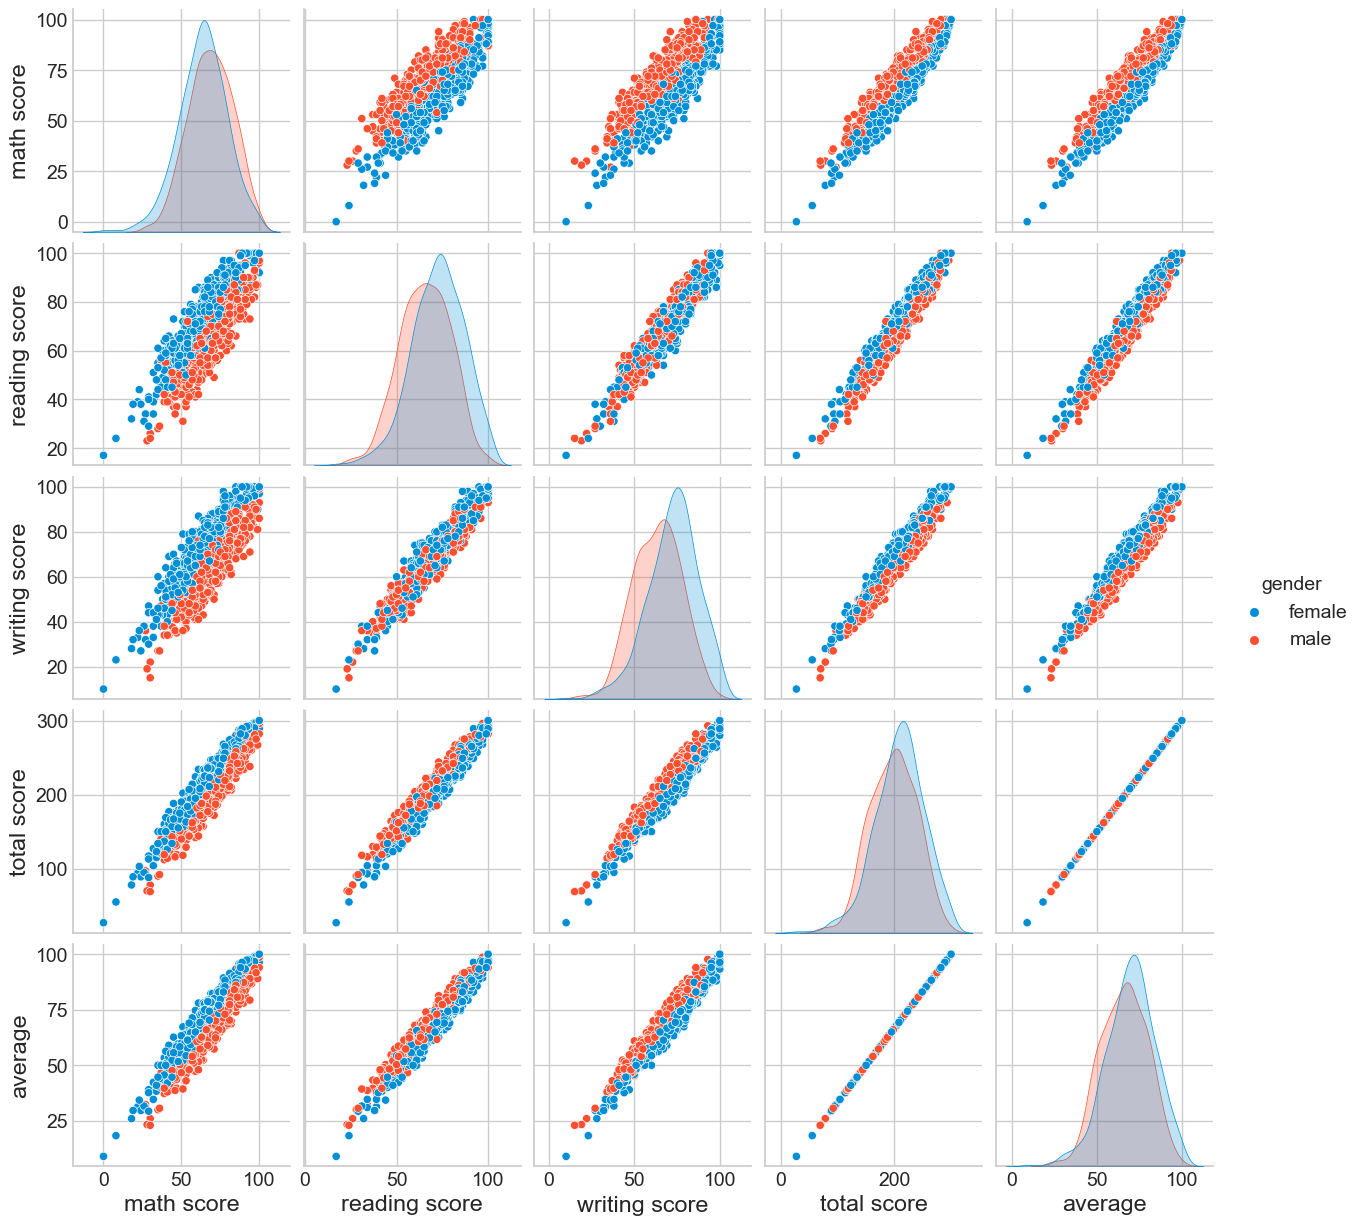

In [37]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights :
* dapat dilihat pada plot diatas bahwa semua skor meningkat terhadap variabel lainnya.

### 5) Kesimpulan
* Performa siswa berhubungan dengan makan siang, ras, latar belakang pendidikan orang tua
* siswa perempuan memimpin untuk presentasi lolos ujian dan juga untuk top skor
* performa siswa tidak terlalu berhubungan dengan persiapan tes skor
* menyelesaikan persiapan pelatihan merupakan hal yang krusial